In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("/home/carlos/reach_bravo_7_ws/src/reach-bravo-7/bravo7_version_2/scripts/identification/ros2_bag_22_Aug_1.pkl", "rb") as f:
    bag_data = pickle.load(f)



In [3]:
bag_data

[{'topic': '/rosout',
  'time': 1755888675381296869,
  'msg': rcl_interfaces.msg.Log(stamp=builtin_interfaces.msg.Time(sec=1755888675, nanosec=373126104), level=20, name='rosbag2_recorder', msg="Subscribed to topic '/bravo/fdb/wrench_estimation'", file='./src/rosbag2_transport/recorder.cpp', function='subscribe_topic', line=368)},
 {'topic': '/robotiq_force_torque_sensor_broadcaster/wrench',
  'time': 1755888675381312184,
  'msg': geometry_msgs.msg.WrenchStamped(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=1755888675, nanosec=376552044), frame_id='robotiq_ft_frame_id'), wrench=geometry_msgs.msg.Wrench(force=geometry_msgs.msg.Vector3(x=-120.75, y=30.190000534057617, z=82.23999786376953), torque=geometry_msgs.msg.Vector3(x=1.4539999961853027, y=2.2269999980926514, z=-0.7689999938011169)))},
 {'topic': '/bravo/fdb/joint_states',
  'time': 1755888675381324654,
  'msg': sensor_msgs.msg.JointState(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=1755888675

In [4]:
type(bag_data[0]["time"])

int

In [5]:
bag_data[0]["msg"].header   

AttributeError: 'Log' object has no attribute 'header'

In [7]:
initial_time = 1755277315.972886830
#               1754504525.4705265

In [9]:
initial_time = bag_data[1]["msg"].header.stamp.sec + bag_data[1]["msg"].header.stamp.nanosec/ 1e9

In [7]:
initial_time

1754504525.4705265

In [16]:
initial_force = bag_data[3]["msg"].force[0]

AttributeError: 'JointState' object has no attribute 'force'

In [11]:
if (bag_data[0]["topic"]=="/robotiq_force_torque_sensor_broadcaster/wrench"):
    print("Found the topic /robotiq_force_torque_sensor_broadcaster/wrench")
else:
    print("Topic not found in the first entry")

Topic not found in the first entry


In [12]:
class JointStateObj:
    def __init__(self):
        # Start with an empty list
        self.data_list = []

    def append(self, time, j1, j2, j3, j4, j5, j6):
        # Append a new measurement as a list
        self.data_list.append([time, j1, j2, j3, j4, j5, j6])

    def get_array(self):
        # Convert to NumPy array when needed
        return np.array(self.data_list)

    def __str__(self):
        return str(self.get_array())

In [13]:
class ForceTorqueObj:
    def __init__(self):
        # Start with an empty list
        self.data_list = []

    def append(self, time, fx, fy, fz):
        # Append a new measurement as a list
        self.data_list.append([time, fx, fy, fz])

    def get_array(self):
        # Convert to NumPy array when needed
        return np.array(self.data_list)

    def __str__(self):
        return str(self.get_array())

In [25]:
class ForceObj:
    def __init__(self):
        # Start with an empty list
        self.data_list = []

    def append(self, time, fx, fy, fz):
        # Append a new measurement as a list
        self.data_list.append([time, fx, fy, fz])

    def get_array(self):
        # Convert to NumPy array when needed
        return np.array(self.data_list)

    def __str__(self):
        return str(self.get_array())

In [26]:
# all_msg.data = {pos_err[0], pos_err[1], pos_err[2], pos_err[3], pos_err[4], pos_err[5], vel_err[0], vel_err[1], vel_err[2], vel_err[3], vel_err[4], vel_err[5], 
#                joint_current_fdb[0], joint_current_fdb[1], joint_current_fdb[2], joint_current_fdb[3], joint_current_fdb[4], joint_current_fdb[5], 
#                joint_position_cmd[0], joint_position_cmd[1], joint_position_cmd[2], joint_position_cmd[3], joint_position_cmd[4], joint_position_cmd[5],
#                joint_velocity_cmd[0], joint_velocity_cmd[1], joint_velocity_cmd[2], joint_velocity_cmd[3], joint_velocity_cmd[4], joint_velocity_cmd[5]};
class Alldata:
    def __init__(self):
        # Start with an empty list
        self.data_list = []

    def append(self, time, pos_err0, pos_err1, pos_err2, pos_err3, pos_err4, pos_err5, vel_err0, vel_err1, vel_err2, vel_err3, vel_err4, vel_err5, 
                joint_current_fdb0, joint_current_fdb1, joint_current_fdb2, joint_current_fdb3, joint_current_fdb4, joint_current_fdb5, 
                joint_position_cmd0, joint_position_cmd1, joint_position_cmd2, joint_position_cmd3, joint_position_cmd4, joint_position_cmd5,
                joint_velocity_cmd0, joint_velocity_cmd1, joint_velocity_cmd2, joint_velocity_cmd3, joint_velocity_cmd4, joint_velocity_cmd5):
        # Append a new measurement as a list
        self.data_list.append([time, pos_err0, pos_err1, pos_err2, pos_err3, pos_err4, pos_err5, vel_err0, vel_err1, vel_err2, vel_err3, vel_err4, vel_err5, 
                joint_current_fdb0, joint_current_fdb1, joint_current_fdb2, joint_current_fdb3, joint_current_fdb4, joint_current_fdb5, 
                joint_position_cmd0, joint_position_cmd1, joint_position_cmd2, joint_position_cmd3, joint_position_cmd4, joint_position_cmd5,
                joint_velocity_cmd0, joint_velocity_cmd1, joint_velocity_cmd2, joint_velocity_cmd3, joint_velocity_cmd4, joint_velocity_cmd5])

    def get_array(self):
        # Convert to NumPy array when needed
        return np.array(self.data_list)

    def __str__(self):
        return str(self.get_array())

In [27]:
#CLASSIFIER
FT_sensor_validate       = ForceTorqueObj()
Bravo_joint_positions    = JointStateObj()
Bravo_joint_currents     = JointStateObj()
FT_estimation            = ForceTorqueObj()
FT_estimation_pos_error  = ForceObj()
all_data                 = Alldata()
tare_ft = True
initial_force_x = 0.0   
initial_force_y = 0.0
initial_force_z = 0.0

for i in range(len(bag_data)):
    if bag_data[i]["topic"] == "/robotiq_force_torque_sensor_broadcaster/wrench":
        if tare_ft:
            initial_force_x = bag_data[i]["msg"].wrench.force.x
            initial_force_y = bag_data[i]["msg"].wrench.force.y
            initial_force_z = bag_data[i]["msg"].wrench.force.z
            tare_ft = False
        FT_sensor_validate.append(
            bag_data[i]["msg"].header.stamp.sec + bag_data[i]["msg"].header.stamp.nanosec/1e9 -initial_time,
            bag_data[i]["msg"].wrench.force.x - initial_force_x,
            bag_data[i]["msg"].wrench.force.y - initial_force_y,
            bag_data[i]["msg"].wrench.force.z - initial_force_z
        )
    if bag_data[i]["topic"] == "/bravo/fdb/wrench_estimation":
        FT_estimation.append(
            bag_data[i]["msg"].header.stamp.sec + bag_data[i]["msg"].header.stamp.nanosec/1e9 -initial_time,
            bag_data[i]["msg"].wrench.force.x,
            bag_data[i]["msg"].wrench.force.y, 
            bag_data[i]["msg"].wrench.force.z,
        )
    if bag_data[i]["topic"] == "/bravo/fdb/joint_currents":
        Bravo_joint_currents.append(
            bag_data[i]["msg"].header.stamp.sec + bag_data[i]["msg"].header.stamp.nanosec/1e9 - initial_time,
            bag_data[i]["msg"].position[0],
            bag_data[i]["msg"].position[1],
            bag_data[i]["msg"].position[2],
            bag_data[i]["msg"].position[3],
            bag_data[i]["msg"].position[4],
            bag_data[i]["msg"].position[5],            
        )
    if bag_data[i]["topic"] == "/bravo/fdb/joint_states":
        Bravo_joint_positions.append(
            bag_data[i]["msg"].header.stamp.sec + bag_data[i]["msg"].header.stamp.nanosec/1e9 - initial_time,
            bag_data[i]["msg"].position[0],
            bag_data[i]["msg"].position[1],
            bag_data[i]["msg"].position[2],
            bag_data[i]["msg"].position[3],
            bag_data[i]["msg"].position[4],
            bag_data[i]["msg"].position[5],            
        )        
    if bag_data[i]["topic"] == "/bravo/fdb/force_estimation":
        FT_estimation_pos_error.append(
            bag_data[i]["msg"].header.stamp.sec + bag_data[i]["msg"].header.stamp.nanosec/1e9 - initial_time,
            bag_data[i]["msg"].vector.x,
            bag_data[i]["msg"].vector.y,
            bag_data[i]["msg"].vector.z,         
        )    
    if bag_data[i]["topic"] == "/force_estimation/all_data":
        all_data.append(
            bag_data[i]["msg"].header.stamp.sec + bag_data[i]["msg"].header.stamp.nanosec/1e9 - initial_time,
            bag_data[i]["msg"].data[0], bag_data[i]["msg"].data[1], bag_data[i]["msg"].data[2], bag_data[i]["msg"].data[3], bag_data[i]["msg"].data[4], bag_data[i]["msg"].data[5], 
            bag_data[i]["msg"].data[6], bag_data[i]["msg"].data[7], bag_data[i]["msg"].data[8], bag_data[i]["msg"].data[9], bag_data[i]["msg"].data[10], bag_data[i]["msg"].data[11], 
            bag_data[i]["msg"].data[12], bag_data[i]["msg"].data[13], bag_data[i]["msg"].data[14], bag_data[i]["msg"].data[15], bag_data[i]["msg"].data[16], bag_data[i]["msg"].data[17], 
            bag_data[i]["msg"].data[18], bag_data[i]["msg"].data[19], bag_data[i]["msg"].data[20], bag_data[i]["msg"].data[21], bag_data[i]["msg"].data[22], bag_data[i]["msg"].data[23],
            bag_data[i]["msg"].data[24], bag_data[i]["msg"].data[25], bag_data[i]["msg"].data[26], bag_data[i]["msg"].data[27], bag_data[i]["msg"].data[28], bag_data[i]["msg"].data[29],         
        )
    

In [17]:
Bravo_joint_positions.get_array()[:, 0]

array([-6.40487671e-03, -3.64804268e-03, -1.17158890e-03, ...,
        9.61920726e+01,  9.61922162e+01,  9.61923602e+01])

## JOINT POSITION ERROR

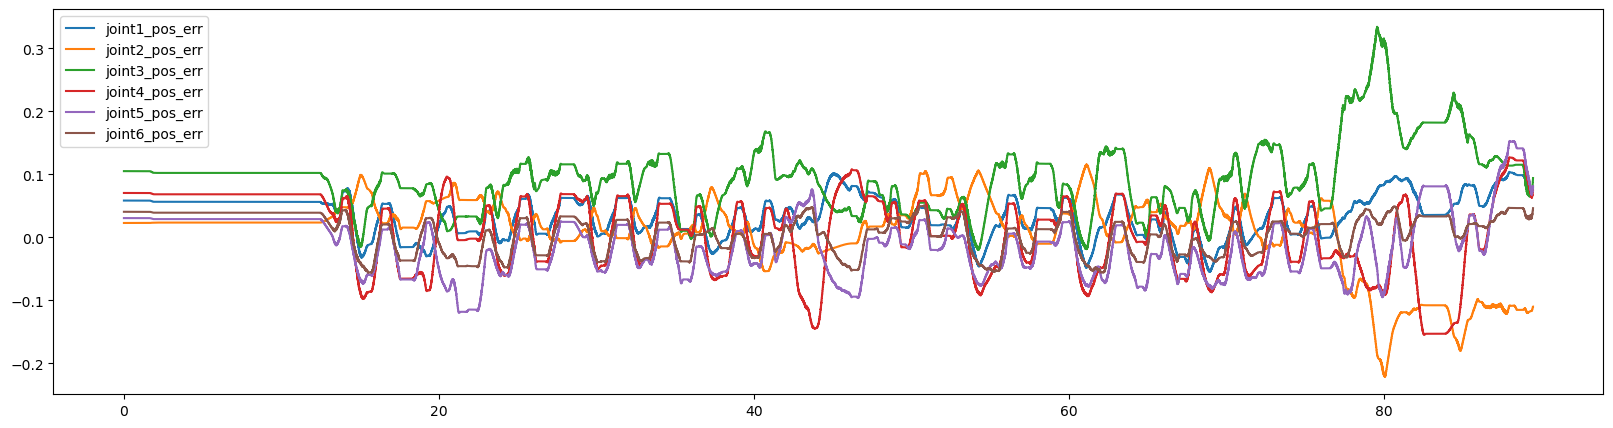

In [33]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 1], label='joint1_pos_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 2], label='joint2_pos_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 3], label='joint3_pos_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 4], label='joint4_pos_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 5], label='joint5_pos_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 6], label='joint6_pos_err')
# To place the legend in a specific location
plt.legend(loc='upper left')

plt.show()

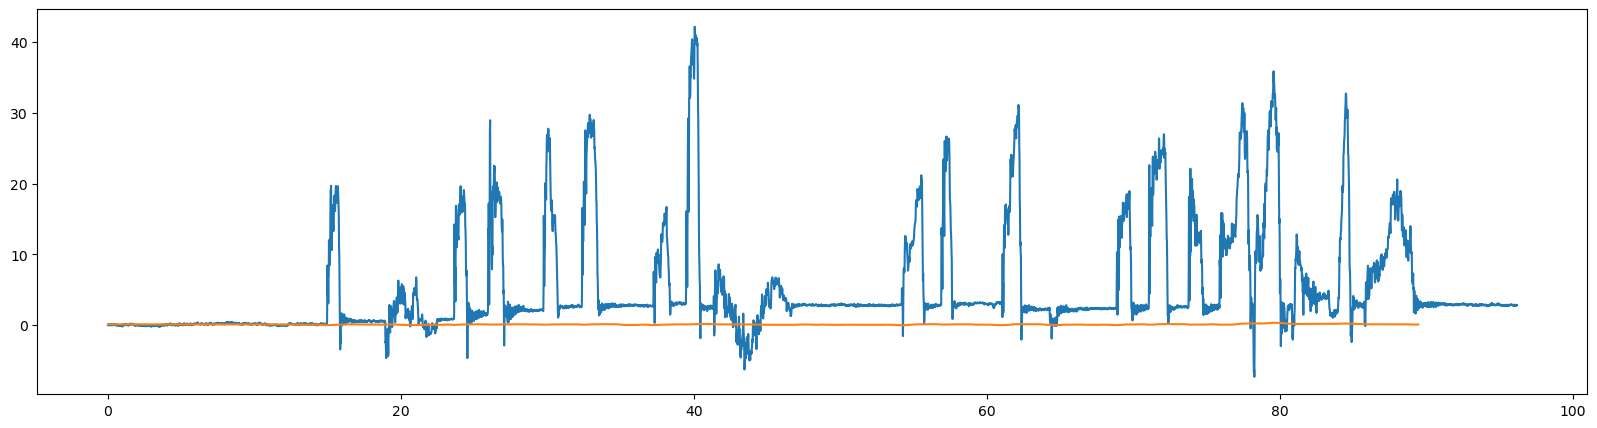

In [41]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
plt.plot(FT_sensor_validate.get_array()[:, 0], FT_sensor_validate.get_array()[:, 2])
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 3], label='joint3_pos_err')
plt.show()

## JOINT VELOCITY ERROR

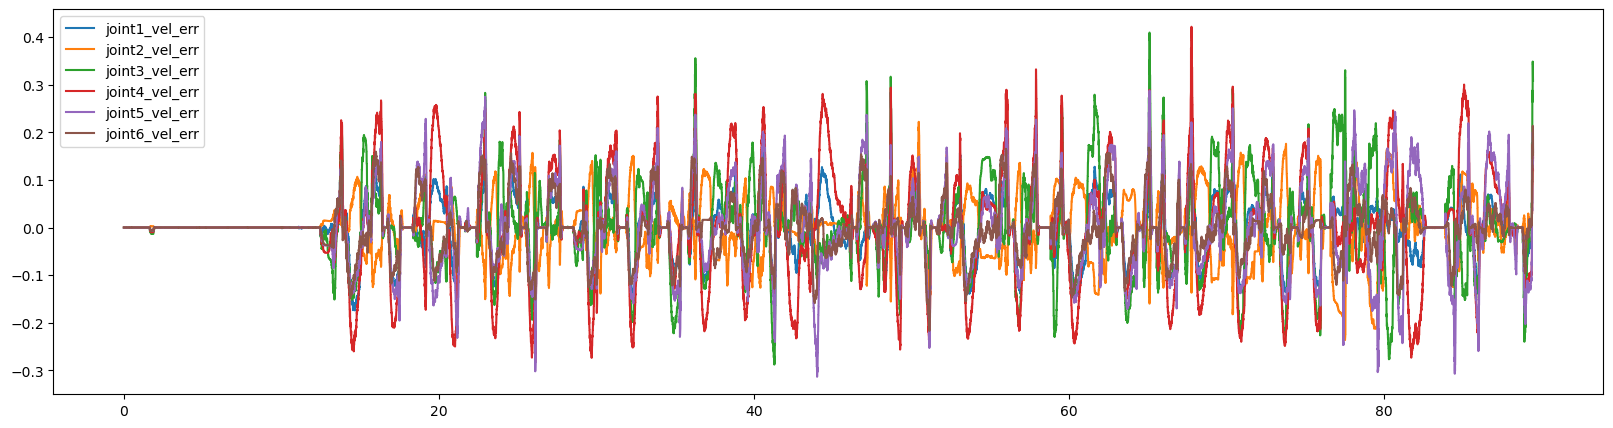

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(20, 5))
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 7], label='joint1_vel_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 8], label='joint2_vel_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 9], label='joint3_vel_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 10], label='joint4_vel_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 11], label='joint5_vel_err')
plt.plot(all_data.get_array()[:, 0], all_data.get_array()[:, 12], label='joint6_vel_err')
# To place the legend in a specific location
plt.legend(loc='upper left')

plt.show()

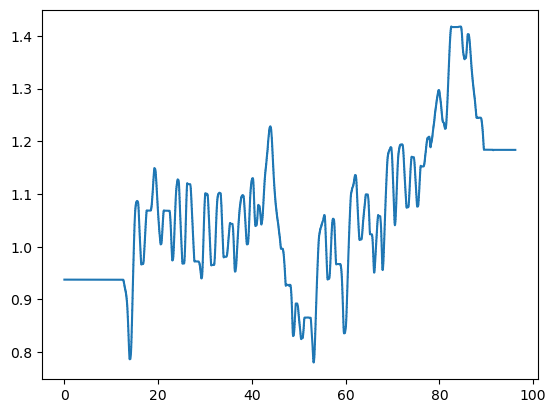

In [18]:
plt.plot(Bravo_joint_positions.get_array()[:, 0], Bravo_joint_positions.get_array()[:, 1])
plt.show()

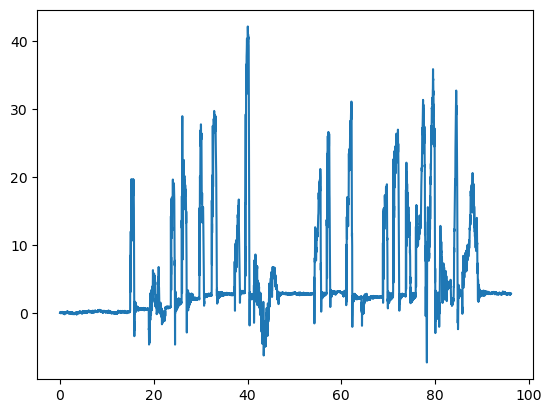

In [19]:
plt.plot(FT_sensor_validate.get_array()[:, 0], FT_sensor_validate.get_array()[:, 2])
plt.show()

Text(0, 0.5, 'Force Z')

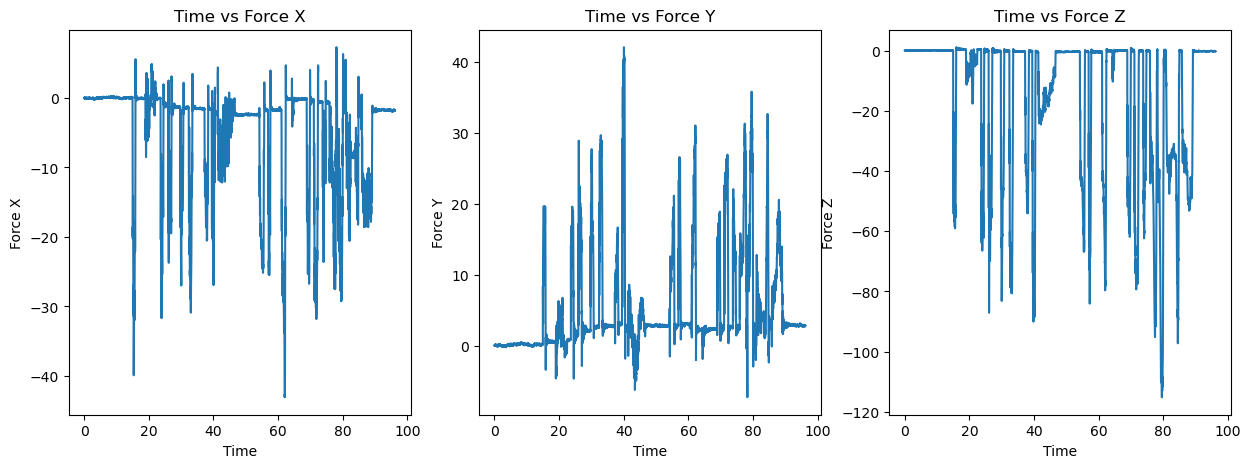

In [20]:

# Create a figure and three subplots


# Plotting the first subplot: column 0 vs column 1
axes[0].plot(FT_sensor_validate.get_array()[:, 0], FT_sensor_validate.get_array()[:, 1])
axes[0].set_title('Time vs Force X')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Force X')

# Plotting the second subplot: column 0 vs column 2 (as requested by the user's code)
axes[1].plot(FT_sensor_validate.get_array()[:, 0], FT_sensor_validate.get_array()[:, 2])
axes[1].set_title('Time vs Force Y')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Force Y')

# Plotting the third subplot: column 0 vs column 3
axes[2].plot(FT_sensor_validate.get_array()[:, 0], FT_sensor_validate.get_array()[:, 3])
axes[2].set_title('Time vs Force Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Force Z')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

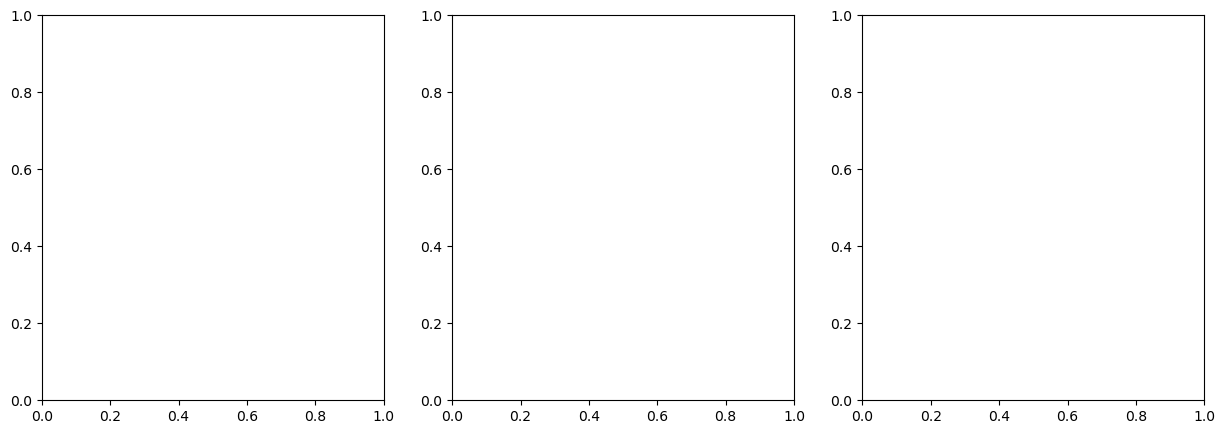

In [21]:
# Create a figure and three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the first subplot: column 0 vs column 1
axes[0].plot(FT_estimation.get_array()[:, 0], FT_estimation.get_array()[:, 1])
axes[0].set_title('Time vs Force X')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Force X')

# Plotting the second subplot: column 0 vs column 2 (as requested by the user's code)
axes[1].plot(FT_estimation.get_array()[:, 0], FT_estimation.get_array()[:, 2])
axes[1].set_title('Time vs Force Y')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Force Y')

# Plotting the third subplot: column 0 vs column 3
axes[2].plot(FT_estimation.get_array()[:, 0], FT_estimation.get_array()[:, 3])
axes[2].set_title('Time vs Force Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Force Z')

Text(0, 0.5, 'Force Z')

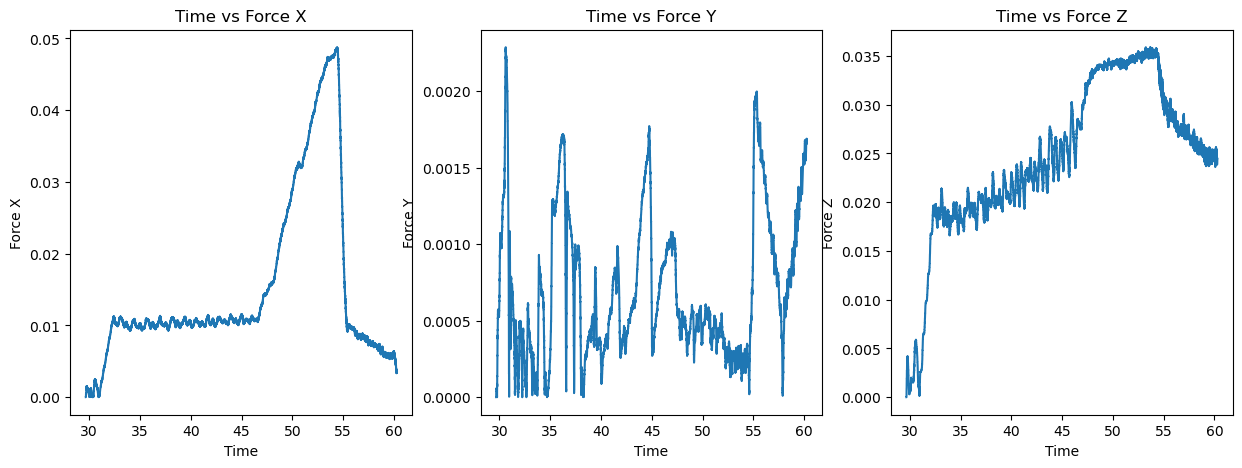

In [37]:
# Create a figure and three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the first subplot: column 0 vs column 1
axes[0].plot(FT_estimation_pos_error.get_array()[:, 0], FT_estimation_pos_error.get_array()[:, 1])
axes[0].set_title('Time vs Force X')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Force X')

# Plotting the second subplot: column 0 vs column 2 (as requested by the user's code)
axes[1].plot(FT_estimation_pos_error.get_array()[:, 0], FT_estimation_pos_error.get_array()[:, 2])
axes[1].set_title('Time vs Force Y')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Force Y')

# Plotting the third subplot: column 0 vs column 3
axes[2].plot(FT_estimation_pos_error.get_array()[:, 0], FT_estimation_pos_error.get_array()[:, 3])
axes[2].set_title('Time vs Force Z')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Force Z')

In [15]:
bag_data[1]["topic"]

'/rosout'

In [18]:
FT_sensor_validate.get_array()


array([[ 1.75450453e+09, -1.20360001e+02,  2.31499996e+01,
         7.58399963e+01],
       [ 1.75450453e+09, -1.20330002e+02,  2.31900005e+01,
         7.58700027e+01],
       [ 1.75450453e+09, -1.20349998e+02,  2.32000008e+01,
         7.58099976e+01],
       ...,
       [ 1.75450458e+09, -1.19610001e+02,  2.34400005e+01,
         7.56600037e+01],
       [ 1.75450458e+09, -1.19550003e+02,  2.32800007e+01,
         7.56600037e+01],
       [ 1.75450458e+09, -1.19709999e+02,  2.33199997e+01,
         7.56299973e+01]])